In [1]:
import pandas as pd
import numpy as np

file_path_substrate = 'MPA_data_substrate.xlsx'
file_path_fish = 'MPA_data_fish.xlsx'
file_path_org = 'MPA_data_org_benthiques.xlsx'

data_substrate = pd.read_excel(file_path_substrate)
data_fish = pd.read_excel(file_path_fish)
data_org = pd.read_excel(file_path_org)


In [2]:
data_fish

,Campaign,Year,Season,Date,Observer,Marine Area,Habitat,Transect,Species,Abundance,Total Length (cm)
0,1,2004,Oct,2004-08-03,Thierry Lison de Loma,Tiahura,Barrier reef,1,Abudefduf septemfasciatus,1,15.0
1,1,2004,Oct,2004-08-03,Thierry Lison de Loma,Tiahura,Barrier reef,1,Acanthurus nigrofuscus,2,15.0
2,1,2004,Oct,2004-08-03,Thierry Lison de Loma,Tiahura,Barrier reef,1,Carcharhinus melanopterus,1,80.0
3,1,2004,Oct,2004-08-03,Thierry Lison de Loma,Tiahura,Barrier reef,1,Centropyge flavissima,2,10.0
4,1,2004,Oct,2004-08-03,Thierry Lison de Loma,Tiahura,Barrier reef,1,Centropyge flavissima,2,8.0
...,...,...,...,...,...,...,...,...,...,...,...
10757,25,2023,Mar,2023-03-10,Ren√© Galzin,Tiahura,Fringing reef,3,Zebrasoma scopas,1,15.0
10758,25,2023,Mar,2023-03-10,Ren√© Galzin,Tiahura,Fringing reef,3,Zebrasoma scopas,2,14.0
10759,25,2023,Mar,2023-03-10,Ren√© Galzin,Tiahura,Fringing reef,3,Zebrasoma scopas,1,13.0
10760,25,2023,Mar,2023-03-10,Ren√© Galzin,Tiahura,Fringing reef,3,Zebrasoma scopas,2,15.0


In [3]:
# multiply the number of fish by the length of the fish to get the biomass
data_fish['Abundance'] = data_fish['Abundance']*data_fish['Total Length (cm)']

In [4]:
data_fish.drop(columns=['Total Length (cm)'], inplace=True)

### Preliminary analysis on the dates

In [5]:
# for all dataframes create a new column joining the columns 'Year' and 'Season'
data_substrate['YearSeason'] = data_substrate['Year'].astype(str) + data_substrate['Season']
data_fish['YearSeason'] = data_fish['Year'].astype(str) + data_fish['Season']
data_org['YearSeason'] = data_org['Year'].astype(str) + data_org['Season']


# replace 2013Feb in data_org with 2013Mar
data_org['YearSeason'].replace('2013Feb', '2013Mar', inplace=True)

# convert the column 'YearSeason' to datetime
data_substrate['YearSeason'] = pd.to_datetime(data_substrate['YearSeason'], format='%Y%b')
data_fish['YearSeason'] = pd.to_datetime(data_fish['YearSeason'], format='%Y%b')
data_org['YearSeason'] = pd.to_datetime(data_org['YearSeason'], format='%Y%b')

data_org.head()

,Campaign,Year,Season,Date,Observer,Marine Area,Habitat,Transect,Species,Abundance,YearSeason
0,1,2004,Oct,2004-08-03,Yannick Chancerelle,Tiahura,Barrier reef,1,Bohadschia argus,2.0,2004-10-01
1,1,2004,Oct,2004-08-03,Yannick Chancerelle,Tiahura,Barrier reef,1,Echinothrix sp.,10.0,2004-10-01
2,1,2004,Oct,2004-08-03,Yannick Chancerelle,Tiahura,Barrier reef,1,Tridacna maxima,3.0,2004-10-01
3,1,2004,Oct,2004-08-03,Yannick Chancerelle,Tiahura,Barrier reef,2,Bohadschia argus,3.0,2004-10-01
4,1,2004,Oct,2004-08-03,Yannick Chancerelle,Tiahura,Barrier reef,2,Echinothrix sp.,6.0,2004-10-01


In [6]:
data_substrate.drop(columns=['Observer', 'Date', 'Year', 'Marine Area', 'Season', 'Campaign'], inplace=True)
data_fish.drop(columns=['Observer', 'Date', 'Year','Marine Area', 'Season', 'Campaign'], inplace=True)
data_org.drop(columns=['Observer', 'Date', 'Year','Marine Area', 'Season', 'Campaign'], inplace=True)

In [7]:
# group substrate in categories
mineral = ['Rubble', 'Sand', 'Pavement', 'Mud']
others = ['Other']
algae = ['Cyanophyceae', 'Macroalgae', 'Dictyota','Asparagopsis', 'Turbinaria', 'Halimeda', 'Padina']
turf = ['Stegastes Turf'] 
dead_coral = [ 'Dead coral']
live_coral = ['Porites', 'Pocillopora', 'Acropora', 'Montipora', 'Pavona', 'Fungia', 'Leptastrea', 'Astrea curta', 'Synarea', 'Acanthastrea', 'Napopora', 'Herpolitha', 'Cyphastrea', 'Goniastrea stelligera', 'Psammocora', 'Millepora', 'Leptoseris', 'Lobophyllia']

data_substrate['Substrate'] = data_substrate['Substrate'].replace(others, 'Others')
data_substrate['Substrate'] = data_substrate['Substrate'].replace(algae, 'Algae')
data_substrate['Substrate'] = data_substrate['Substrate'].replace(dead_coral, 'Dead Coral')
data_substrate['Substrate'] = data_substrate['Substrate'].replace(live_coral, 'Live Coral')
data_substrate['Substrate'] = data_substrate['Substrate'].replace(turf, 'Turf')


In [8]:
# group the lines with same category substrate and date and habitat and transect and add their proportions together
data_substrate = data_substrate.groupby(['YearSeason', 'Habitat', 'Transect', 'Substrate']).sum().reset_index()

C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\3158970061.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_substrate = data_substrate.groupby(['YearSeason', 'Habitat', 'Transect', 'Substrate']).sum().reset_index()


In [9]:
for specie in data_org['Species'].unique():
    if data_org[data_org['Species'] == specie]['Abundance'].sum() == 0:
        data_org.drop(data_org[data_org['Species'] == specie].index, inplace=True)

In [10]:
data_org

,Habitat,Transect,Species,Abundance,YearSeason
0,Barrier reef,1,Bohadschia argus,2.0,2004-10-01
1,Barrier reef,1,Echinothrix sp.,10.0,2004-10-01
2,Barrier reef,1,Tridacna maxima,3.0,2004-10-01
3,Barrier reef,2,Bohadschia argus,3.0,2004-10-01
4,Barrier reef,2,Echinothrix sp.,6.0,2004-10-01
...,...,...,...,...,...
384,Barrier reef,1,Tridacna maxima,5.0,2022-03-01
385,Barrier reef,1,Echinothrix sp.,5.0,2022-03-01
386,Barrier reef,2,Bohadschia argus,1.0,2023-03-01
387,Barrier reef,3,Bohadschia argus,1.0,2023-03-01


In [11]:
# group the lines with same date and habitat and transect and add their proportions together
data_org = data_org.groupby(['YearSeason', 'Habitat', 'Transect', 'Species']).sum().reset_index()

In [12]:
for specie in data_fish['Species'].unique():
    if data_fish[data_fish['Species'] == specie]['Abundance'].sum() == 0:
        data_fish.drop(data_fish[data_fish['Species'] == specie].index, inplace=True)

In [13]:
data_fish

,Habitat,Transect,Species,Abundance,YearSeason
0,Barrier reef,1,Abudefduf septemfasciatus,15.0,2004-10-01
1,Barrier reef,1,Acanthurus nigrofuscus,30.0,2004-10-01
2,Barrier reef,1,Carcharhinus melanopterus,80.0,2004-10-01
3,Barrier reef,1,Centropyge flavissima,20.0,2004-10-01
4,Barrier reef,1,Centropyge flavissima,16.0,2004-10-01
...,...,...,...,...,...
10757,Fringing reef,3,Zebrasoma scopas,15.0,2023-03-01
10758,Fringing reef,3,Zebrasoma scopas,28.0,2023-03-01
10759,Fringing reef,3,Zebrasoma scopas,13.0,2023-03-01
10760,Fringing reef,3,Zebrasoma scopas,30.0,2023-03-01


In [14]:
dict_fish = pd.read_csv('../trophic_groups.csv', sep=',', header=None)

In [15]:
# replace the family names with the family names from the dictionary
data_fish['Species'] = data_fish['Species'].replace(dict_fish[0].tolist(), dict_fish[1].tolist())

In [16]:
# rename the 'Species' column to 'Category'
data_org.rename(columns={'Species': 'Category'}, inplace=True)
data_fish.rename(columns={'Troph_group': 'Category'}, inplace=True)

# rename the 'Substrate' column to 'Category'
data_substrate.rename(columns={'Substrate': 'Category'}, inplace=True)

In [17]:
# for data substrate, if at a certain date, in a certain habitat, in a certain transect, a category is not present, add it with proportion 0
for date in data_substrate['YearSeason'].unique():
    for habitat in data_substrate[data_substrate['YearSeason'] == date]['Habitat'].unique():
        for transect in data_substrate[(data_substrate['YearSeason'] == date) & (data_substrate['Habitat'] == habitat)]['Transect'].unique():
            for category in data_substrate['Category'].unique():
                if not data_substrate[(data_substrate['YearSeason'] == date) & (data_substrate['Habitat'] == habitat) & (data_substrate['Transect'] == transect) & (data_substrate['Category'] == category)].empty:
                    continue
                else:
                    data_substrate = data_substrate._append({'YearSeason': date, 'Habitat': habitat, 'Transect': transect, 'Category': category, 'proportion': 0}, ignore_index=True)

# Analyse par zone

In [18]:
# moyenne sur les transects
data_bar_fish = data_fish[data_fish['Habitat'] == 'Barrier reef']
data_out_fish = data_fish[data_fish['Habitat'] == 'Outer slope']
data_frin_fish = data_fish[data_fish['Habitat'] == 'Fringing reef']

data_bar_fish.drop(columns=['Habitat'], inplace=True)
data_out_fish.drop(columns=['Habitat'], inplace=True)
data_frin_fish.drop(columns=['Habitat'], inplace=True)

C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\1429539303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar_fish.drop(columns=['Habitat'], inplace=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\1429539303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out_fish.drop(columns=['Habitat'], inplace=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\1429539303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [19]:
data_bar_fish = data_bar_fish.groupby(['YearSeason', 'Species']).sum().reset_index()
data_out_fish = data_out_fish.groupby(['YearSeason', 'Species']).sum().reset_index()
data_frin_fish = data_frin_fish.groupby(['YearSeason', 'Species']).sum().reset_index()


In [20]:
data_bar_fish.drop(columns=['Transect'], inplace=True)
data_out_fish.drop(columns=['Transect'], inplace=True)
data_frin_fish.drop(columns=['Transect'], inplace=True)

In [21]:
data_bar_fish

,YearSeason,Species,Abundance
0,2004-10-01,C,399.0
1,2004-10-01,Co,214.0
2,2004-10-01,H,1307.0
3,2004-10-01,O,589.0
4,2004-10-01,P,10.0
...,...,...,...
127,2023-03-01,C,1036.0
128,2023-03-01,Co,106.0
129,2023-03-01,H,1317.0
130,2023-03-01,O,1120.0


In [22]:
# same for substrate
data_bar_substrate = data_substrate[data_substrate['Habitat'] == 'Barrier reef']
data_out_substrate = data_substrate[data_substrate['Habitat'] == 'Outer slope']
data_frin_substrate = data_substrate[data_substrate['Habitat'] == 'Fringing reef']

data_bar_substrate.drop(columns=['Habitat'], inplace=True)
data_out_substrate.drop(columns=['Habitat'], inplace=True)
data_frin_substrate.drop(columns=['Habitat'], inplace=True)

data_bar_substrate = data_bar_substrate.groupby(['YearSeason', 'Category']).mean().reset_index()
data_out_substrate = data_out_substrate.groupby(['YearSeason', 'Category']).mean().reset_index()
data_frin_substrate = data_frin_substrate.groupby(['YearSeason', 'Category']).mean().reset_index()

data_bar_substrate.drop(columns=['Transect'], inplace=True)
data_out_substrate.drop(columns=['Transect'], inplace=True)
data_frin_substrate.drop(columns=['Transect'], inplace=True)

data_bar_substrate

C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\287132994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar_substrate.drop(columns=['Habitat'], inplace=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\287132994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out_substrate.drop(columns=['Habitat'], inplace=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\287132994.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,YearSeason,Category,proportion
0,2004-10-01,Algae,0.026667
1,2004-10-01,Dead Coral,0.000000
2,2004-10-01,Live Coral,0.153333
3,2004-10-01,Mud,0.000000
4,2004-10-01,Others,0.000000
...,...,...,...
211,2022-03-01,Others,0.000000
212,2022-03-01,Pavement,0.140000
213,2022-03-01,Rubble,0.080000
214,2022-03-01,Sand,0.440000


In [23]:
# same for organism
data_bar_org = data_org[data_org['Habitat'] == 'Barrier reef']
data_out_org = data_org[data_org['Habitat'] == 'Outer slope']
data_frin_org = data_org[data_org['Habitat'] == 'Fringing reef']

data_bar_org.drop(columns=['Habitat'], inplace=True)
data_out_org.drop(columns=['Habitat'], inplace=True)
data_frin_org.drop(columns=['Habitat'], inplace=True)

data_bar_org = data_bar_org.groupby(['YearSeason', 'Category']).sum().reset_index()
data_out_org = data_out_org.groupby(['YearSeason', 'Category']).sum().reset_index()
data_frin_org = data_frin_org.groupby(['YearSeason', 'Category']).sum().reset_index()

data_bar_org.drop(columns=['Transect'], inplace=True)
data_out_org.drop(columns=['Transect'], inplace=True)
data_frin_org.drop(columns=['Transect'], inplace=True)

data_bar_org

C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\789051597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar_org.drop(columns=['Habitat'], inplace=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\789051597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out_org.drop(columns=['Habitat'], inplace=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\789051597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,YearSeason,Category,Abundance
0,2004-10-01,Bohadschia argus,9.0
1,2004-10-01,Diadema sp.,4.0
2,2004-10-01,Echinothrix sp.,17.0
3,2004-10-01,Tridacna maxima,6.0
4,2005-03-01,Bohadschia argus,7.0
...,...,...,...
82,2022-03-01,Echinothrix sp.,23.0
83,2022-03-01,Halodeima atra,1.0
84,2022-03-01,Tridacna maxima,12.0
85,2023-03-01,Bohadschia argus,2.0


In [24]:
data_bar_fish.reset_index(inplace=True)
data_out_fish.reset_index(inplace=True)
data_frin_fish.reset_index(inplace=True)

In [25]:
# pivot the tables
data_bar_fish = data_bar_fish.pivot(index='YearSeason', columns='Species', values='Abundance')
data_out_fish = data_out_fish.pivot(index='YearSeason', columns='Species', values='Abundance')
data_frin_fish = data_frin_fish.pivot(index='YearSeason', columns='Species', values='Abundance')

# data_bar_substrate = data_bar_substrate.pivot(index='YearSeason', columns='Specis', values='proportion')
# data_out_substrate = data_out_substrate.pivot(index='YearSeason', columns='Species', values='proportion')
# data_frin_substrate = data_frin_substrate.pivot(index='YearSeason', columns='Species', values='proportion')

# data_bar_org = data_bar_org.pivot(index='YearSeason', columns='Species', values='Abundance')
# data_out_org = data_out_org.pivot(index='YearSeason', columns='Species', values='Abundance')
# data_frin_org = data_frin_org.pivot(index='YearSeason', columns='Species', values='Abundance')

In [26]:
data_bar_fish.fillna(0, inplace=True)
data_out_fish.fillna(0, inplace=True)
data_frin_fish.fillna(0, inplace=True)

# data_bar_substrate.fillna(0, inplace=True)
# data_out_substrate.fillna(0, inplace=True)
# data_frin_substrate.fillna(0, inplace=True)

# data_bar_org.fillna(0, inplace=True)
# data_out_org.fillna(0, inplace=True)
# data_frin_org.fillna(0, inplace=True)

In [27]:
data_out_fish

Species,C,Co,H,O,P,Pi
YearSeason,,,,,,
2004-10-01,898.0,398.0,1450.0,2169.0,242.0,181.0
2005-03-01,1413.0,555.0,1415.0,2933.0,179.0,309.0
2005-10-01,1257.0,334.0,1595.0,2405.0,248.0,96.0
2006-03-01,1338.0,744.0,3340.0,3563.0,283.0,177.0
2006-10-01,1375.0,454.0,2460.0,1663.0,355.0,303.0
2007-03-01,1857.0,569.0,2752.0,2714.0,306.0,381.0
2007-10-01,1416.0,368.0,3136.0,2431.0,464.0,297.0
2008-03-01,1630.0,272.0,2950.0,2346.0,270.0,191.0
2008-10-01,1262.0,110.0,2603.0,2499.0,323.0,131.0


In [28]:
# add a total abundance column for fish and organism
data_bar_fish['Total'] = data_bar_fish.sum(axis=1)
data_out_fish['Total'] = data_out_fish.sum(axis=1)
data_frin_fish['Total'] = data_frin_fish.sum(axis=1)

# data_bar_org['Total'] = data_bar_org.sum(axis=1)
# data_out_org['Total'] = data_out_org.sum(axis=1)
# data_frin_org['Total'] = data_frin_org.sum(axis=1)

# # normalize it by the tmax abundance
# data_bar_fish['Total'] = data_bar_fish['Total'] / data_bar_fish['Total'].max()
# data_out_fish['Total'] = data_out_fish['Total'] / data_out_fish['Total'].max()
# data_frin_fish['Total'] = data_frin_fish['Total'] / data_frin_fish['Total'].max()

# data_bar_org['Total'] = data_bar_org['Total'] / data_bar_org['Total'].max()
# data_out_org['Total'] = data_out_org['Total'] / data_out_org['Total'].max()
# data_frin_org['Total'] = data_frin_org['Total'] / data_frin_org['Total'].max()


In [29]:
# normalize the data

# remove the total column and save it
data_bar_fish_total = data_bar_fish['Total']
data_out_fish_total = data_out_fish['Total']
data_frin_fish_total = data_frin_fish['Total']

# data_bar_org_total = data_bar_org['Total']
# data_out_org_total = data_out_org['Total']
# data_frin_org_total = data_frin_org['Total']

data_bar_fish.drop(columns=['Total'], inplace=True)
data_out_fish.drop(columns=['Total'], inplace=True)
data_frin_fish.drop(columns=['Total'], inplace=True)

# data_bar_org.drop(columns=['Total'], inplace=True)
# data_out_org.drop(columns=['Total'], inplace=True)
# data_frin_org.drop(columns=['Total'], inplace=True)

data_bar_fish = data_bar_fish.div(data_bar_fish.sum(axis=1), axis=0)
data_out_fish = data_out_fish.div(data_out_fish.sum(axis=1), axis=0)
data_frin_fish = data_frin_fish.div(data_frin_fish.sum(axis=1), axis=0)

# data_bar_org = data_bar_org.div(data_bar_org.sum(axis=1), axis=0)
# data_out_org = data_out_org.div(data_out_org.sum(axis=1), axis=0)
# data_frin_org = data_frin_org.div(data_frin_org.sum(axis=1), axis=0)

# # add the total column back
# data_bar_fish['Total'] = data_bar_fish_total
# data_out_fish['Total'] = data_out_fish_total
# data_frin_fish['Total'] = data_frin_fish_total

# data_bar_org['Total'] = data_bar_org_total
# data_out_org['Total'] = data_out_org_total
# data_frin_org['Total'] = data_frin_org_total

In [30]:
data_out_fish

Species,C,Co,H,O,P,Pi
YearSeason,,,,,,
2004-10-01,0.168228,0.074560,0.271637,0.406332,0.045335,0.033908
2005-03-01,0.207672,0.081570,0.207966,0.431070,0.026308,0.045414
2005-10-01,0.211794,0.056276,0.268745,0.405223,0.041786,0.016175
2006-03-01,0.141662,0.078772,0.353626,0.377237,0.029963,0.018740
2006-10-01,0.208018,0.068684,0.372163,0.251589,0.053707,0.045840
2007-03-01,0.216459,0.066325,0.320783,0.316354,0.035668,0.044411
2007-10-01,0.174556,0.045365,0.386588,0.299679,0.057199,0.036612
2008-03-01,0.212822,0.035514,0.385168,0.306306,0.035253,0.024938
2008-10-01,0.182159,0.015878,0.375722,0.360710,0.046622,0.018909


In [31]:
def shannon(row):
    return -np.sum(row*np.log(row + 1e-10))

def pielou(row):
    return shannon(row) / np.log2(np.count_nonzero(row))

def brillouin(row):
    return np.prod(list(np.math.factorial(elt) for elt in row)) / np.math.factorial(np.sum(row))  

def simpson(row):
    return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))

In [32]:
shannon_out = data_out_fish.apply(shannon, axis=1)

<Axes: xlabel='YearSeason'>

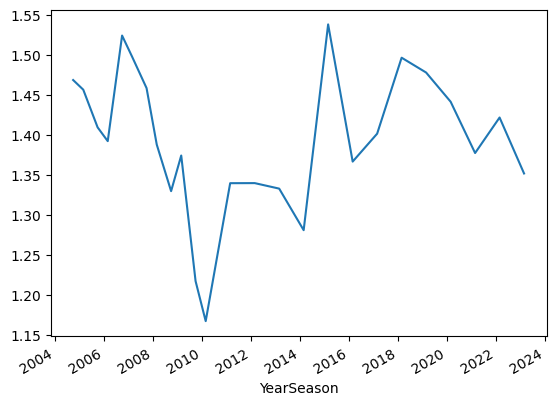

In [33]:
shannon_out.plot()

In [34]:
pielou_out = data_out_fish.apply(pielou, axis=1)

<Axes: xlabel='YearSeason'>

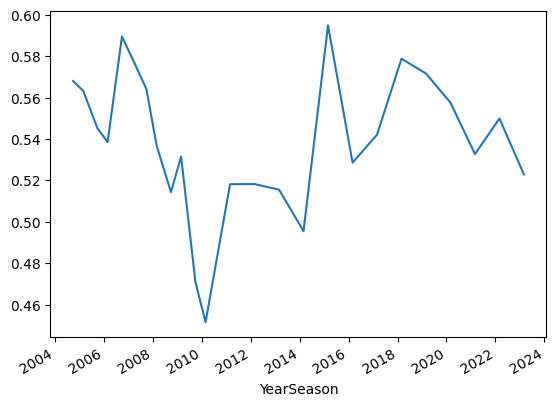

In [35]:
pielou_out.plot()

In [36]:
data_out_fish_abs = data_out_fish.mul(data_out_fish_total, axis=0)

In [37]:
data_out_fish_abs = data_out_fish_abs.round(0).astype(int)

In [38]:
brillouin_out = data_out_fish_abs.apply(brillouin, axis=1)

C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\597807937.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.prod(list(np.math.factorial(elt) for elt in row)) / np.math.factorial(np.sum(row))


<Axes: xlabel='YearSeason'>

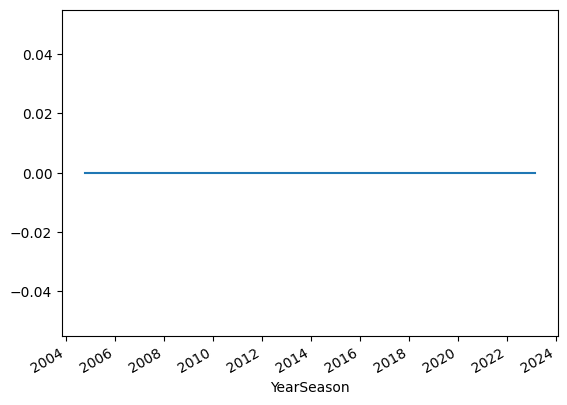

In [39]:
brillouin_out.plot()

In [40]:
simpson_out = data_out_fish_abs.apply(simpson, axis=1)

C:\Users\alexi\AppData\Local\Temp\ipykernel_4828\597807937.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))


<Axes: xlabel='YearSeason'>

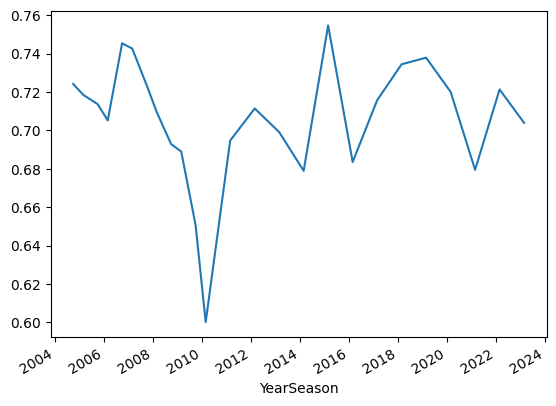

In [41]:
simpson_out.plot()

In [42]:
data_bar_org

,YearSeason,Category,Abundance
0,2004-10-01,Bohadschia argus,9.0
1,2004-10-01,Diadema sp.,4.0
2,2004-10-01,Echinothrix sp.,17.0
3,2004-10-01,Tridacna maxima,6.0
4,2005-03-01,Bohadschia argus,7.0
...,...,...,...
82,2022-03-01,Echinothrix sp.,23.0
83,2022-03-01,Halodeima atra,1.0
84,2022-03-01,Tridacna maxima,12.0
85,2023-03-01,Bohadschia argus,2.0


In [43]:
data_out_fish['Total'] = data_out_fish_total

In [44]:
# data_bar_fish.to_csv('MPA_fish_bar_2004-2023_annuel.csv')
# data_out_fish.to_csv('MPA_fish_out_2004-2023_annuel.csv')
# data_frin_fish.to_csv('MPA_fish_frin_2004-2023_annuel.csv')

# FIN DE LA PARTIE UTILISEE DANS LE PROJET

In [45]:
# data_out_org.to_csv('MPA_org_out_2006-2020_annuel.csv')
# data_frin_org.to_csv('MPA_org_frin_2006-2020_annuel.csv')
# data_bar_org.to_csv('MPA_org_bar_2006-2020_annuel.csv')

In [46]:
# data_bar_substrate.to_csv('MPA_sub_bar_2004-2023_annuel.csv')
# data_out_substrate.to_csv('MPA_sub_out_2004-2023_annuel.csv')
# data_frin_substrate.to_csv('MPA_sub_frin_2004-2023_annuel.csv')

In [47]:
# # plot the data for a given habitat
# import matplotlib.pyplot as plt

# plt.plot(data_bar[data_bar['Category'] == 'Live Coral']['YearSeason'], data_bar[data_bar['Category'] == 'Live Coral']['Abundance'], label = 'Live Coral')
# plt.plot(data_bar[data_bar['Category'] == 'Dead Coral']['YearSeason'], data_bar[data_bar['Category'] == 'Dead Coral']['Abundance'], label = 'Dead Coral')
# plt.plot(data_bar[data_bar['Category'] == 'Vegetal']['YearSeason'], data_bar[data_bar['Category'] == 'Vegetal']['Abundance'], label = 'Vegetal')
# # plt.plot(data_bar[data_bar['Category'] == 'Mineral']['YearSeason'], data_bar[data_bar['Category'] == 'Mineral']['proportion'], label = 'Mineral')
# plt.plot(data_bar[data_bar['Category'] == 'Others']['YearSeason'], data_bar[data_bar['Category'] == 'Others']['Abundance'], label = 'Others')
# plt.plot(data_bar[data_bar['Category'] == 'Fish']['YearSeason'], data_bar[data_bar['Category'] == 'Fish']['Abundance'], label = 'Fish')
# plt.plot(data_bar[data_bar['Category'] == 'Acanthaster']['YearSeason'], data_bar[data_bar['Category'] == 'Acanthaster']['Abundance'], label = 'Acanthaster')
# plt.plot(data_bar[data_bar['Category'] == 'Benthos']['YearSeason'], data_bar[data_bar['Category'] == 'Benthos']['Abundance'], label = 'Benthos')

# plt.legend()
# # plt.ylim(0, 1)

### Dead coral est très sensible à ce qu'on met dedans, notamment le tuff ! voir si même on inclut les algues, le mineral... ! 

In [48]:
# transform data so that each category is a column
data_bar = data_bar.pivot(index='YearSeason', columns='Category', values='Abundance').reset_index()
data_out = data_out.pivot(index='YearSeason', columns='Category', values='Abundance').reset_index()
data_frin = data_frin.pivot(index='YearSeason', columns='Category', values='Abundance').reset_index()

NameError: name 'data_bar' is not defined

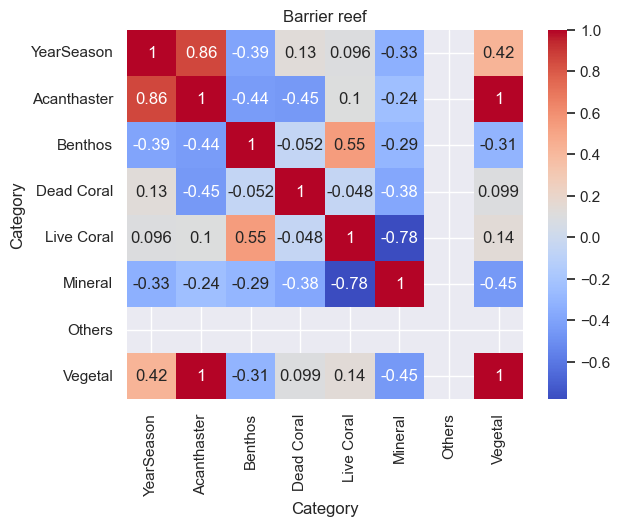

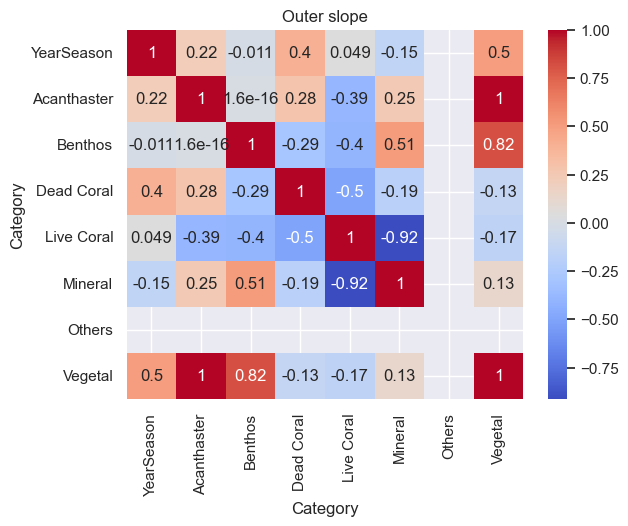

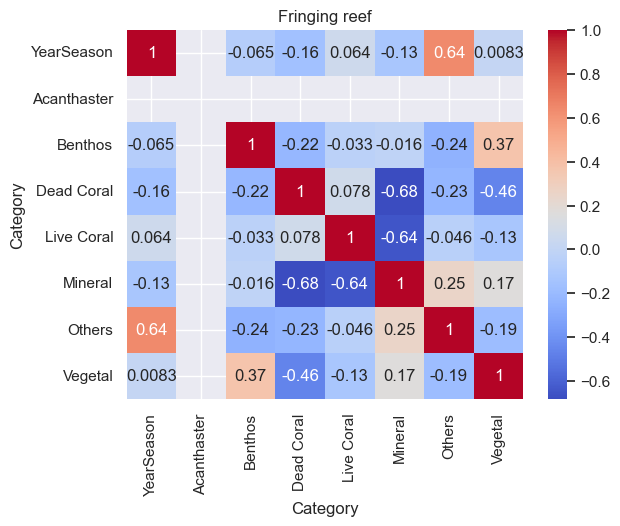

In [ ]:
# correlation matrix
corr_bar = data_bar.corr(method='pearson')
corr_out = data_out.corr(method='pearson')
corr_frin = data_frin.corr(method='pearson')

# plot the correlation matrix
import seaborn as sns

sns.heatmap(corr_bar, annot=True, cmap='coolwarm')
plt.title('Barrier reef')
plt.show()

sns.heatmap(corr_out, annot=True, cmap='coolwarm')
plt.title('Outer slope')
plt.show()

sns.heatmap(corr_frin, annot=True, cmap='coolwarm')
plt.title('Fringing reef')
plt.show()

In [ ]:
# # plot the data for a given habitat
# import matplotlib.pyplot as plt

# def plot_data(habitat):
#     if habitat == 'Barrier reef':
#         plt.plot(data_bar['YearSeason'], data_bar['Live Coral'], label = 'Live Coral')
#         plt.plot(data_bar['YearSeason'], data_bar['Dead Coral'], label = 'Dead Coral')
#         plt.plot(data_bar['YearSeason'], data_bar['Vegetal'], label = 'Vegetal')
#         plt.plot(data_bar['YearSeason'], data_bar['Others'], label = 'Others')
#         plt.plot(data_bar['YearSeason'], data_bar['Fish'], label = 'Fish')
#         plt.plot(data_bar['YearSeason'], data_bar['Acanthaster'], label = 'Acanthaster')
#         plt.plot(data_bar['YearSeason'], data_bar['Benthos'], label = 'Benthos')
#     elif habitat == 'Outer slope':
#         plt.plot(data_out['YearSeason'], data_out['Live Coral'], label = 'Live Coral')
#         plt.plot(data_out['YearSeason'], data_out['Dead Coral'], label = 'Dead Coral')
#         plt.plot(data_out['YearSeason'], data_out['Vegetal'], label = 'Vegetal')
#         plt.plot(data_out['YearSeason'], data_out['Others'], label = 'Others')
#         plt.plot(data_out['YearSeason'], data_out['Fish'], label = 'Fish')
#         plt.plot(data_out['YearSeason'], data_out['Acanthaster'], label = 'Acanthaster')
#         plt.plot(data_out['YearSeason'], data_out['Benthos'], label = 'Benthos')
#     elif habitat == 'Fringing reef':
#         plt.plot(data_frin['YearSeason'], data_frin['Live Coral'], label = 'Live Coral')
#         plt.plot(data_frin['YearSeason'], data_frin['Dead Coral'], label = 'Dead Coral')
#         plt.plot(data_frin['YearSeason'], data_frin['Vegetal'], label = 'Vegetal')
#         plt.plot(data_frin['YearSeason'], data_frin['Others'], label = 'Others')
#         plt.plot(data_frin['YearSeason'], data_frin['Fish'], label = 'Fish')
#         plt.plot(data_frin['YearSeason'], data_frin['Acanthaster'], label = 'Acanthaster')
#         plt.plot(data_frin['YearSeason'], data_frin['Benthos'], label = 'Benthos')
#     plt.legend()

In [ ]:
# plot_data('Barrier reef')

In [ ]:
# plot_data('Outer slope')

In [ ]:
# plot_data('Fringing reef')

### il y a des coupures dans le plot qu'il n'y avait pas avant, à débuguer

In [ ]:
data_bar

Category,YearSeason,Acanthaster,Benthos,Dead Coral,Live Coral,Mineral,Others,Vegetal
0,2004-10-01,NaN,0.352941,NaN,0.173333,0.820000,NaN,0.020000
1,2005-03-01,NaN,0.225490,0.020000,0.220000,0.773333,NaN,NaN
2,2005-10-01,NaN,0.196078,0.093667,0.288333,0.611000,0.02,NaN
3,2006-03-01,NaN,0.470588,0.020000,0.376967,0.563500,NaN,0.052800
4,2006-10-01,NaN,0.558824,NaN,0.266667,0.720000,NaN,0.020000
5,2007-03-01,NaN,0.225490,0.090000,0.253333,0.673333,NaN,0.020000
6,2007-10-01,0.029412,0.176471,0.030000,0.140000,0.833333,NaN,0.020000
7,2008-03-01,NaN,0.058824,NaN,0.186667,0.813333,NaN,NaN
8,2008-10-01,0.029412,0.421569,0.086667,0.240000,0.673333,NaN,NaN
9,2009-03-01,NaN,0.313725,0.033333,0.246667,0.660000,NaN,0.060000


# Search for interesting variables

### PCA (need to clear the NaN)

### il faut enlever Live Coral nan ?

In [ ]:
# interpolate the data
data_bar.interpolate(method='linear', limit_direction='both', inplace=True)
data_out.interpolate(method='linear', limit_direction='both', inplace=True)
data_frin.interpolate(method='linear', limit_direction='both', inplace=True)

In [ ]:
data_bar_time = data_bar['YearSeason']
data_out_time = data_out['YearSeason']
data_frin_time = data_frin['YearSeason']

data_bar_live = data_bar['Live Coral']
data_out_live = data_out['Live Coral']
data_frin_live = data_frin['Live Coral']

In [ ]:
# naive pre-processing
data_bar.drop(columns=['YearSeason', 'Acanthaster', 'Others', 'Live Coral'], inplace=True)
data_out.drop(columns=['YearSeason', 'Acanthaster', 'Others', 'Live Coral'], inplace=True)
data_frin.drop(columns=['YearSeason', 'Acanthaster', 'Others', 'Live Coral'], inplace=True)

In [ ]:
# compute the cumulative explained variance
from sklearn.decomposition import PCA

pca_bar = PCA(n_components=5)
pca_bar.fit(data_bar)
pca_bar.explained_variance_ratio_.cumsum()

pca_out = PCA(n_components=5)
pca_out.fit(data_out)
pca_out.explained_variance_ratio_.cumsum()

pca_frin = PCA(n_components=5)
pca_frin.fit(data_frin)
pca_frin.explained_variance_ratio_.cumsum()

# plot the cumulative explained variance
plt.plot(pca_bar.explained_variance_ratio_.cumsum(), label='Barrier reef')
plt.plot(pca_out.explained_variance_ratio_.cumsum(), label='Outer slope')
plt.plot(pca_frin.explained_variance_ratio_.cumsum(), label='Fringing reef')
plt.legend()
plt.title('Cumulative explained variance')
plt.show()


ValueError: n_components=5 must be between 0 and min(n_samples, n_features)=4 with svd_solver='full'

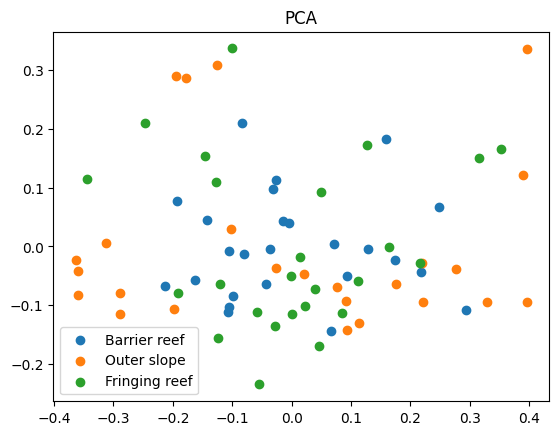

In [ ]:
# we choose 3 components
pca_bar = PCA(n_components=3)
pca_bar.fit(data_bar)
pca_out = PCA(n_components=3)
pca_out.fit(data_out)
pca_frin = PCA(n_components=3)
pca_frin.fit(data_frin)

# plot the data in the new space
data_bar_pca = pca_bar.transform(data_bar)
data_out_pca = pca_out.transform(data_out)
data_frin_pca = pca_frin.transform(data_frin)

plt.scatter(data_bar_pca[:, 0], data_bar_pca[:, 1], label='Barrier reef')
plt.scatter(data_out_pca[:, 0], data_out_pca[:, 1], label='Outer slope')
plt.scatter(data_frin_pca[:, 0], data_frin_pca[:, 1], label='Fringing reef')
plt.legend()
plt.title('PCA')
plt.show()

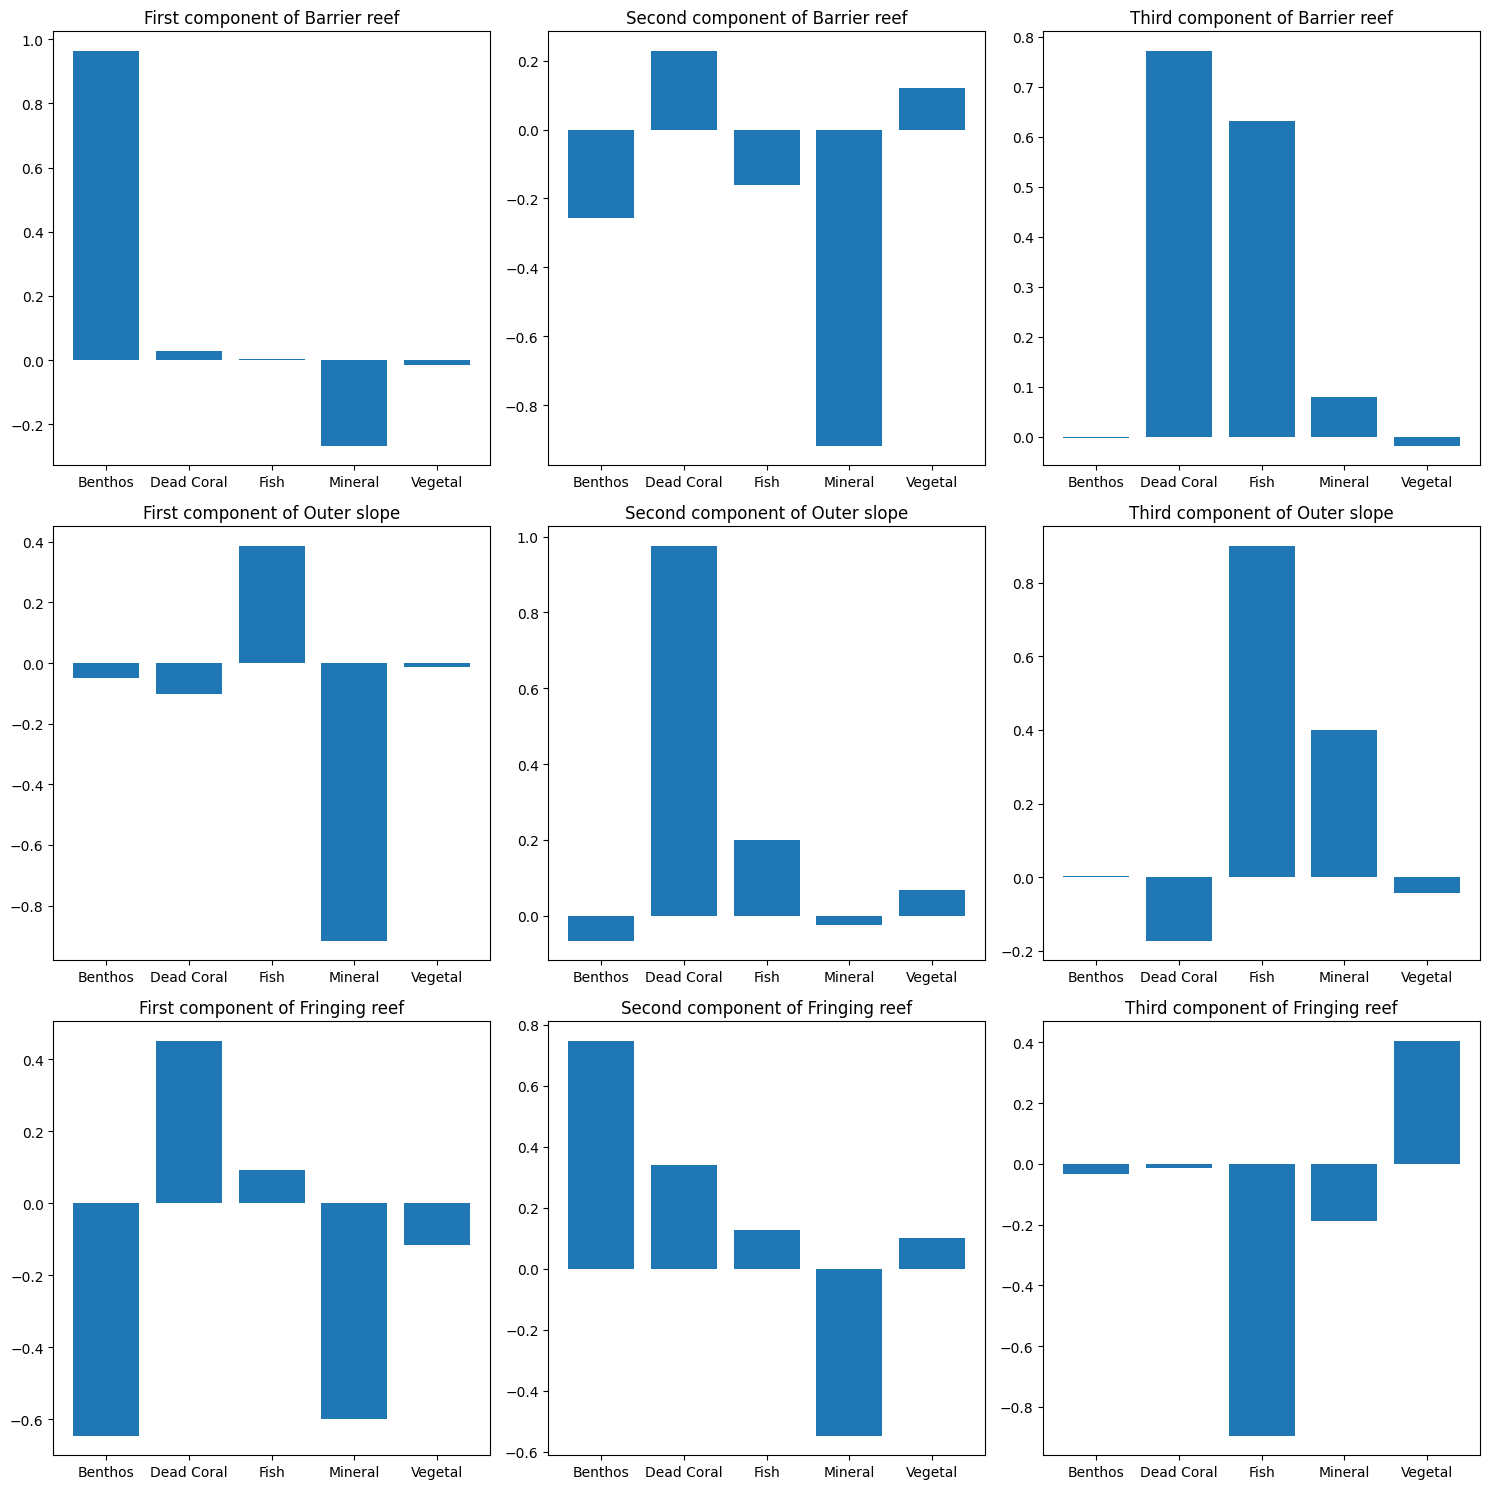

In [ ]:
# show the contribution of each variable to the components with a bar plot and the names of the variables
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[0, 0].bar(np.arange(5), pca_bar.components_[0])
ax[0, 0].set_xticks(np.arange(5))
ax[0, 0].set_xticklabels(data_bar.columns)
ax[0, 0].set_title('First component of Barrier reef')
ax[1, 0].bar(np.arange(5), pca_out.components_[0])
ax[1, 0].set_xticks(np.arange(5))
ax[1, 0].set_xticklabels(data_out.columns)
ax[1, 0].set_title('First component of Outer slope')
ax[2, 0].bar(np.arange(5), pca_frin.components_[0])
ax[2, 0].set_xticks(np.arange(5))
ax[2, 0].set_xticklabels(data_frin.columns)
ax[2, 0].set_title('First component of Fringing reef')
ax[0, 1].bar(np.arange(5), pca_bar.components_[1])
ax[0, 1].set_xticks(np.arange(5))
ax[0, 1].set_xticklabels(data_bar.columns)
ax[0, 1].set_title('Second component of Barrier reef')
ax[1, 1].bar(np.arange(5), pca_out.components_[1])
ax[1, 1].set_xticks(np.arange(5))
ax[1, 1].set_xticklabels(data_out.columns)
ax[1, 1].set_title('Second component of Outer slope')
ax[2, 1].bar(np.arange(5), pca_frin.components_[1])
ax[2, 1].set_xticks(np.arange(5))
ax[2, 1].set_xticklabels(data_frin.columns)
ax[2, 1].set_title('Second component of Fringing reef')
ax[0, 2].bar(np.arange(5), pca_bar.components_[2])
ax[0, 2].set_xticks(np.arange(5))
ax[0, 2].set_xticklabels(data_bar.columns)
ax[0, 2].set_title('Third component of Barrier reef')
ax[1, 2].bar(np.arange(5), pca_out.components_[2])
ax[1, 2].set_xticks(np.arange(5))
ax[1, 2].set_xticklabels(data_out.columns)
ax[1, 2].set_title('Third component of Outer slope')
ax[2, 2].bar(np.arange(5), pca_frin.components_[2])
ax[2, 2].set_xticks(np.arange(5))
ax[2, 2].set_xticklabels(data_frin.columns)
ax[2, 2].set_title('Third component of Fringing reef')
plt.tight_layout()
plt.show()





In [ ]:
# express 'Live Coral' as a combination of the 3 components

data_bar['Live Coral'] = data_bar_live
data_out['Live Coral'] = data_out_live
data_frin['Live Coral'] = data_frin_live

from sklearn.linear_model import LinearRegression

reg_bar = LinearRegression().fit(data_bar_pca, data_bar['Live Coral'])
reg_out = LinearRegression().fit(data_out_pca, data_out['Live Coral'])
reg_frin = LinearRegression().fit(data_frin_pca, data_frin['Live Coral'])

# results
print('Barrier reef :')
print('Coefficients :', reg_bar.coef_)
print('Intercept :', reg_bar.intercept_)
print('R2 :', reg_bar.score(data_bar_pca, data_bar['Live Coral']))
print('Outer slope :')
print('Coefficients :', reg_out.coef_)
print('Intercept :', reg_out.intercept_)
print('R2 :', reg_out.score(data_out_pca, data_out['Live Coral']))
print('Fringing reef :')
print('Coefficients :', reg_frin.coef_)
print('Intercept :', reg_frin.intercept_)
print('R2 :', reg_frin.score(data_frin_pca, data_frin['Live Coral']))


Barrier reef :
Coefficients : [ 0.27427677  0.44690252 -0.44157369]
Intercept : 0.2352786666666667
R2 : 0.6791093441234549
Outer slope :
Coefficients : [ 0.8063311  -0.32555009 -0.18175009]
Intercept : 0.3002693333333334
R2 : 0.8944458788030302
Fringing reef :
Coefficients : [0.23218055 0.12928693 0.31555408]
Intercept : 0.262672
R2 : 0.2741292058003507


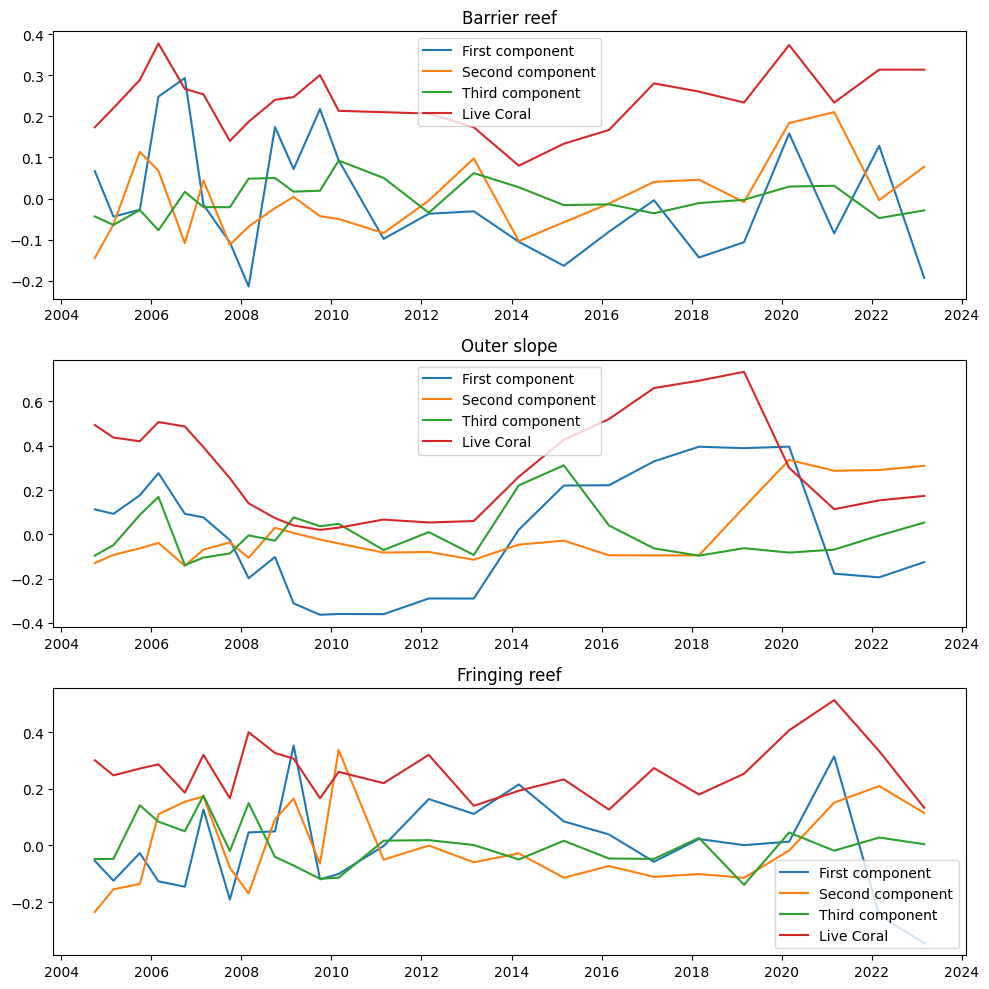

In [ ]:
# plot the 3 components and the 'Live Coral' data as time series
# insert the 'YearSeason' column in the dataframes
data_bar['YearSeason'] = data_bar_time
data_out['YearSeason'] = data_out_time
data_frin['YearSeason'] = data_frin_time

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(data_bar['YearSeason'], data_bar_pca[:, 0], label='First component')
ax[0].plot(data_bar['YearSeason'], data_bar_pca[:, 1], label='Second component')
ax[0].plot(data_bar['YearSeason'], data_bar_pca[:, 2], label='Third component')
ax[0].plot(data_bar['YearSeason'], data_bar['Live Coral'], label='Live Coral')
ax[0].legend()
ax[0].set_title('Barrier reef')
ax[1].plot(data_out['YearSeason'], data_out_pca[:, 0], label='First component')
ax[1].plot(data_out['YearSeason'], data_out_pca[:, 1], label='Second component')
ax[1].plot(data_out['YearSeason'], data_out_pca[:, 2], label='Third component')
ax[1].plot(data_out['YearSeason'], data_out['Live Coral'], label='Live Coral')
ax[1].legend()
ax[1].set_title('Outer slope')
ax[2].plot(data_frin['YearSeason'], data_frin_pca[:, 0], label='First component')
ax[2].plot(data_frin['YearSeason'], data_frin_pca[:, 1], label='Second component')
ax[2].plot(data_frin['YearSeason'], data_frin_pca[:, 2], label='Third component')
ax[2].plot(data_frin['YearSeason'], data_frin['Live Coral'], label='Live Coral')
ax[2].legend()
ax[2].set_title('Fringing reef')
plt.tight_layout()
plt.show()

In [ ]:
# compute the correlation between the 3 components and the 'Live Coral' data
print('Barrier reef :')
print('First component :', np.corrcoef(data_bar_pca[:, 0], data_bar['Live Coral'])[0, 1])
print('Second component :', np.corrcoef(data_bar_pca[:, 1], data_bar['Live Coral'])[0, 1])
print('Third component :', np.corrcoef(data_bar_pca[:, 2], data_bar['Live Coral'])[0, 1])
print('Outer slope :')
print('First component :', np.corrcoef(data_out_pca[:, 0], data_out['Live Coral'])[0, 1])
print('Second component :', np.corrcoef(data_out_pca[:, 1], data_out['Live Coral'])[0, 1])
print('Third component :', np.corrcoef(data_out_pca[:, 2], data_out['Live Coral'])[0, 1])
print('Fringing reef :')
print('First component :', np.corrcoef(data_frin_pca[:, 0], data_frin['Live Coral'])[0, 1])
print('Second component :', np.corrcoef(data_frin_pca[:, 1], data_frin['Live Coral'])[0, 1])
print('Third component :', np.corrcoef(data_frin_pca[:, 2], data_frin['Live Coral'])[0, 1])

Barrier reef :
First component : 0.5400952968622285
Second component : 0.5651134610515368
Third component : -0.26087006453234485
Outer slope :
First component : 0.9178596894375544
Second component : -0.21044238725215614
Third component : -0.08771243330474605
Fringing reef :
First component : 0.40407132252860645
Second component : 0.19752958078271665
Third component : 0.2680254406322989


### pour l'instant on regarde plutôt live coral que dead coral car ce-dernier ne renferme pas une notion très claire (on inclut tuff ? ...)

### à tester sur PMana : évolution First component Outer Slope vs Live Coral

In [ ]:
# export the data
data_bar.to_csv('data_bar.csv', index=False)

# Now i'm going to try to do it without categorizing to identify the important factors with more accuracy

## Preliminary analysis to eliminate the lowest represented species, which cannot be interpreted

In [ ]:
data_substrate = pd.read_excel(file_path_substrate)
data_fish = pd.read_excel(file_path_fish)
data_org = pd.read_excel(file_path_org)

In [ ]:
# for all dataframes create a new column joining the columns 'Year' and 'Season'
data_substrate['YearSeason'] = data_substrate['Year'].astype(str) + data_substrate['Season']
data_fish['YearSeason'] = data_fish['Year'].astype(str) + data_fish['Season']
data_org['YearSeason'] = data_org['Year'].astype(str) + data_org['Season']


# replace 2013Feb in data_org with 2013Mar
data_org['YearSeason'].replace('2013Feb', '2013Mar', inplace=True)

# convert the column 'YearSeason' to datetime
data_substrate['YearSeason'] = pd.to_datetime(data_substrate['YearSeason'], format='%Y%b')
data_fish['YearSeason'] = pd.to_datetime(data_fish['YearSeason'], format='%Y%b')
data_org['YearSeason'] = pd.to_datetime(data_org['YearSeason'], format='%Y%b')

In [ ]:
data_substrate.drop(columns=['Observer', 'Date', 'Year', 'Marine Area', 'Season', 'Campaign'], inplace=True)
data_fish.drop(columns=['Observer', 'Date', 'Year','Marine Area', 'Season', 'Campaign'], inplace=True)
data_org.drop(columns=['Observer', 'Date', 'Year','Marine Area', 'Season', 'Campaign'], inplace=True)

In [ ]:
data_substrate.drop(columns=['observations'], inplace=True)

In [ ]:
data_fish.drop(columns=['Total Length (cm)'], inplace=True) # we'll study the size later

In [ ]:
# rename the 'Species' column to 'Category'
data_org.rename(columns={'Species': 'Category'}, inplace=True)
data_fish.rename(columns={'Species': 'Category'}, inplace=True)

# rename the 'Substrate' column to 'Category'
data_substrate.rename(columns={'Substrate': 'Category'}, inplace=True)

In [ ]:
# merge the dataframes
data = pd.concat([data_substrate, data_fish, data_org], axis=0)

In [ ]:
data

,Habitat,Transect,Category,proportion,YearSeason,Abundance
0,Barrier reef,1,Pocillopora,0.04,2004-10-01,NaN
1,Barrier reef,1,Porites,0.16,2004-10-01,NaN
2,Barrier reef,1,Halimeda,0.02,2004-10-01,NaN
3,Barrier reef,1,Turbinaria,0.06,2004-10-01,NaN
4,Barrier reef,1,Rubble,0.16,2004-10-01,NaN
...,...,...,...,...,...,...
384,Barrier reef,1,Tridacna maxima,NaN,2022-03-01,5.0
385,Barrier reef,1,Echinothrix sp.,NaN,2022-03-01,5.0
386,Barrier reef,2,Bohadschia argus,NaN,2023-03-01,1.0
387,Barrier reef,3,Bohadschia argus,NaN,2023-03-01,1.0


In [ ]:
# moyenne sur les transects
data_bar = data[data['Habitat'] == 'Barrier reef']
data_out = data[data['Habitat'] == 'Outer slope']
data_frin = data[data['Habitat'] == 'Fringing reef']

data_bar.drop(columns=['Habitat'], inplace=True)
data_out.drop(columns=['Habitat'], inplace=True)
data_frin.drop(columns=['Habitat'], inplace=True)

data_bar = data_bar.groupby(['YearSeason', 'Category']).mean().reset_index()
data_out = data_out.groupby(['YearSeason', 'Category']).mean().reset_index()
data_frin = data_frin.groupby(['YearSeason', 'Category']).mean().reset_index()

C:\Users\alexi\AppData\Local\Temp\ipykernel_181964\3736124363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar.drop(columns=['Habitat'], inplace=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_181964\3736124363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out.drop(columns=['Habitat'], inplace=True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_181964\3736124363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [ ]:
data_bar.drop(columns=['Transect'], inplace=True)
data_out.drop(columns=['Transect'], inplace=True)
data_frin.drop(columns=['Transect'], inplace=True)

In [ ]:
data_bat_time = data_bar['YearSeason']
data_out_time = data_out['YearSeason']
data_frin_time = data_frin['YearSeason']

In [ ]:
data_bar.drop(columns=['YearSeason'], inplace=True)
data_out.drop(columns=['YearSeason'], inplace=True)
data_frin.drop(columns=['YearSeason'], inplace=True)

### To normalize the data, first we have to study the abundance of the categories

In [ ]:
# print the top 10 categories with the highest representation
data_bar.groupby(['Category']).mean().sort_values(by='proportion', ascending=False).head(20)


,proportion,Abundance
Category,,
Sand,0.391744,NaN
Pavement,0.203055,NaN
Porites,0.139894,NaN
Rubble,0.131483,NaN
Stegastes Turf,0.065778,NaN
Synarea,0.064836,NaN
Napopora,0.059733,NaN
Dead coral,0.056333,NaN
Turbinaria,0.054229,NaN


In [ ]:
# print the top 10 categories with the highest representation
data_bar.groupby(['Category']).sum().sort_values(by='proportion', ascending=False).head(20)

,proportion,Abundance
Category,,
Sand,9.401867,0.0
Pavement,4.467200,0.0
Porites,3.357467,0.0
Rubble,3.155600,0.0
Stegastes Turf,0.986667,0.0
Synarea,0.972533,0.0
Turbinaria,0.867667,0.0
Pocillopora,0.660000,0.0
Dead coral,0.507000,0.0


In [ ]:
# print the top 10 categories with the highest representation
data_bar.groupby(['Category']).mean().sort_values(by='Abundance', ascending=False).head(10)

,proportion,Abundance
Category,,
Clupeidae sp,NaN,300.000000
Chromis viridis,NaN,11.703704
Acanthurus triostegus,NaN,10.000000
Ctenochaetus striatus,NaN,5.646015
Echinothrix sp.,NaN,5.068627
Halichoeres margaritaceus,NaN,5.000000
Scarus schlegeli,NaN,4.433333
Stegastes nigricans,NaN,4.022216
Tridacna maxima,NaN,3.576000


In [ ]:
# print the top 10 categories with the highest representation
data_bar.groupby(['Category']).sum().sort_values(by='Abundance', ascending=False).head(10)

,proportion,Abundance
Category,,
Clupeidae sp,0.0,300.000000
Ctenochaetus striatus,0.0,141.150363
Chromis viridis,0.0,105.333333
Stegastes nigricans,0.0,100.555411
Tridacna maxima,0.0,89.400000
Echinothrix sp.,0.0,86.166667
Thalassoma hardwicke,0.0,58.291109
Scarus psittacus,0.0,54.000000
Scarus schlegeli,0.0,53.200000


In [ ]:
# print the top 10 categories with the highest number of observations
data_bar['Category'].value_counts().head(20)


Category
Thalassoma hardwicke        25
Tridacna maxima             25
Stegastes nigricans         25
Ctenochaetus striatus       25
Sand                        24
Chaetodon citrinellus       24
Rubble                      24
Porites                     24
Centropyge flavissima       23
Pavement                    22
Halichoeres hortulanus      22
Acanthurus nigrofuscus      20
Pocillopora                 20
Halichoeres trimaculatus    20
Chlorurus sordidus          20
Bohadschia argus            20
Chrysiptera leucopoma       19
Zebrasoma scopas            19
Echinothrix sp.             17
Chaetodon lunulatus         17
Name: count, dtype: int64

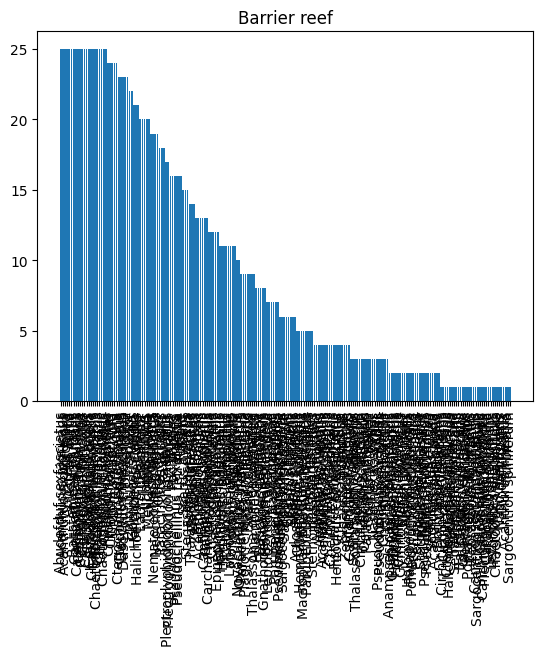

In [ ]:
# plot the number of observations for each category
plt.bar(data_out['Category'].unique(), data_out['Category'].value_counts())
plt.xticks(rotation=90)
plt.title('Barrier reef')
plt.show()

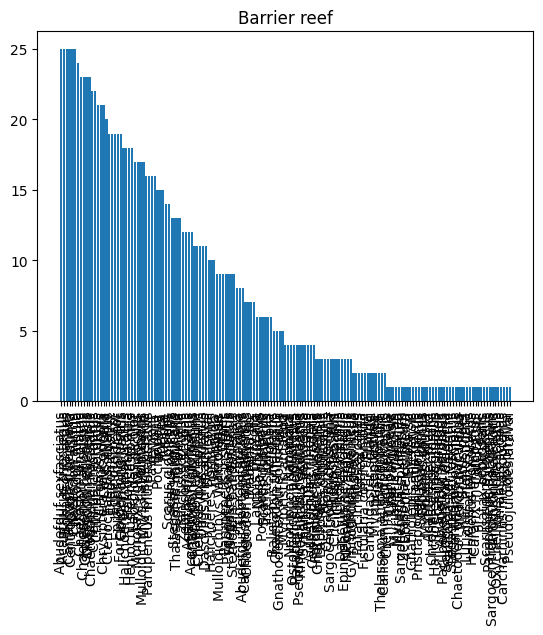

In [ ]:
# plot the number of observations for each category
plt.bar(data_frin['Category'].unique(), data_frin['Category'].value_counts())
plt.xticks(rotation=90)
plt.title('Barrier reef')
plt.show()

In [ ]:
# find the distribution of the categories
data_bar.groupby('Category').count()


,proportion,Abundance
Category,,
Abudefduf septemfasciatus,0,2
Abudefduf sexfasciatus,0,6
Abudefduf sordidus,0,6
Acanthaster planci,0,4
Acanthurus nigricauda,0,1
...,...,...
Trochus niloticus,0,3
Turbinaria,16,0
Zanclus cornutus,0,6


In [ ]:
data_bar

,Category,proportion,Abundance
0,Abudefduf septemfasciatus,NaN,1.000000
1,Acanthurus nigrofuscus,NaN,1.500000
2,Balistapus undulatus,NaN,1.000000
3,Bohadschia argus,NaN,3.000000
4,Carcharhinus melanopterus,NaN,1.000000
...,...,...,...
1012,Thalassoma hardwicke,NaN,1.642857
1013,Thalassoma trilobatum,NaN,1.000000
1014,Tridacna maxima,NaN,2.000000
1015,Zanclus cornutus,NaN,1.000000
